In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='whitegrid',palette='dark')
import numpy as np

In [3]:
df = pd.read_csv('ex1data1.txt', names=['population', 'profit'])


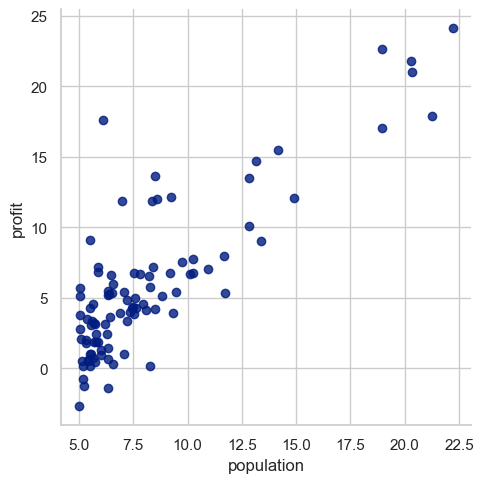

In [4]:
# fig = plt.plot(df['population'], df['profit'], 'rx')
sns.lmplot(x='population',y='profit', data=df, fit_reg=False)
plt.show()

In [5]:
def get_X(df):
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df], axis=1 )
    return np.array(data.iloc[:, :-1])

def get_y(df):
    return np.array(df.iloc[:, -1])

def normalize_feature(df: pd.DataFrame):
    return df.apply(lambda colume: (colume - colume.mean()) / colume.std())

In [6]:
normalize_feature(df)

,population,profit
0,-0.529654,2.132905
1,-0.680150,0.597261
2,0.092716,1.419690
3,-0.298872,1.091575
4,-0.594333,0.178606
...,...,...
92,-0.591517,0.247495
93,-0.737593,-0.699102
94,0.034523,-1.033453
95,1.352547,0.583632


In [7]:
data = df.copy()
X = get_X(data)
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y))
theta = np.zeros(X.shape[1])

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


In [8]:
theta = np.zeros(X.shape[1])

In [9]:
def lr_cost(theta, X, y):
    m = X.shape[0]
    inner = X @ theta - y
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)
    return cost

In [10]:
lr_cost(theta, X, y)

32.072733877455654

In [11]:
def gradient(theta, X, y):
    m = X.shape[0]
    inner = X.T @ (X @ theta - y)

    return inner / m

In [12]:
X.T @ (X @ theta - y)

array([ -566.3961    , -6336.89842532])

In [13]:
def batch_gradient_decent(theta, X, y, epoch, alpha=0.01):
    cost_data = [lr_cost(theta, X, y)]
    _theta = theta.copy()
    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, y)
        cost_data.append(lr_cost(_theta, X, y))
    
    return _theta, cost_data

def batch_gradient_decent2(theta, X, y, epoch, alpha=0.01):
    cost_data = [lr_cost(theta, X, y)]
    _theta = theta.copy()
    theta_set = [_theta]
    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, y)
        theta_set.append(list(_theta))
        cost_data.append(lr_cost(_theta, X, y))
    
    return np.array(theta_set), cost_data



In [52]:
epoch = 1500
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch)
final_theta

array([-3.63029144,  1.16636235])

In [48]:
epoch = 500
theta_set, cost_data = batch_gradient_decent2(theta, X, y, epoch)

In [49]:
def lr_cost_plus(theta1, theta2, X, y):
    size = theta1.shape
    m = X.shape[0]
    cost = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            theta = np.array([theta1[i,j],theta2[i,j]])
            # inner = X @ theta - y
            # square_sum = inner.T @ inner
            cost[i][j] = lr_cost(theta, X, y)
    return cost

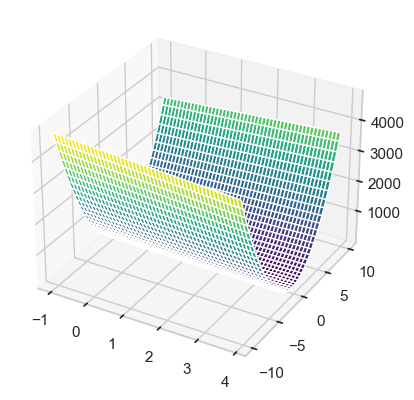

In [54]:
t1 = np.arange(-1, 4, 0.1)
t2 = np.arange(-10, 10, 0.1)
theta_vals = [[t1[i], t2[i]] for i in range(len(t1)) if True]
# lr_cost()
m, n = np.meshgrid(t1, t2)
Z_vals = lr_cost_plus(m, n, X, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(m, n, Z_vals, cmap='viridis')

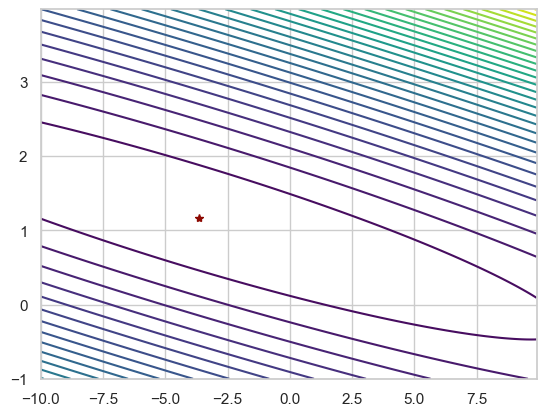

In [55]:
t2 = np.arange(-1, 4, 0.025)
t1 = np.arange(-10, 10, 0.1)
theta_vals = [[t1[i], t2[i]] for i in range(len(t1)) if True]
# lr_cost()
m, n = np.meshgrid(t1, t2)
Z_vals = lr_cost_plus(m, n, X, y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(m, n, Z_vals, levels=30, cmap='viridis')
ax.plot(final_theta[0], final_theta[1], 'r*')


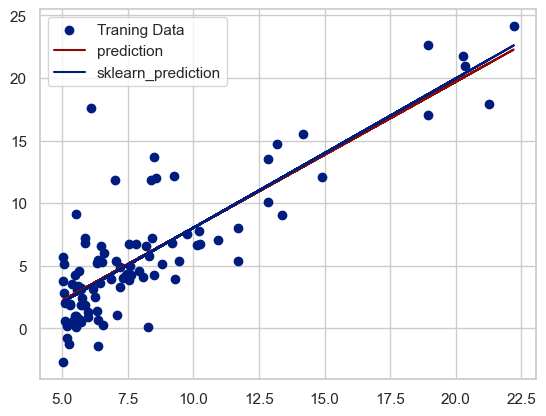

In [56]:
from sklearn import linear_model
model = linear_model.LinearRegression()
x = X[:, 1].reshape(-1, 1)
f = X @ final_theta
model.fit(x, y)
f2=model.predict(x).flatten()
plt.scatter(x, y, label='Traning Data')
plt.plot(x, f, 'r', label='prediction')
plt.plot(x, f2, 'b', label='sklearn_prediction')
plt.legend(loc=2)
plt.show()

In [57]:
model.coef_

array([1.19303364])

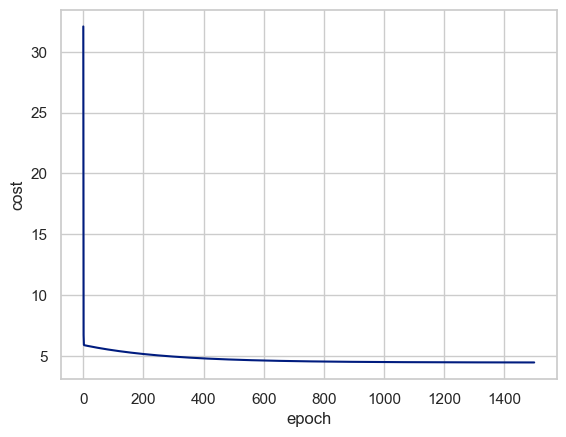

In [58]:
ax = sns.lineplot(cost_data)
ax.set_xlabel('epoch')
ax.set_ylabel('cost')
plt.show()

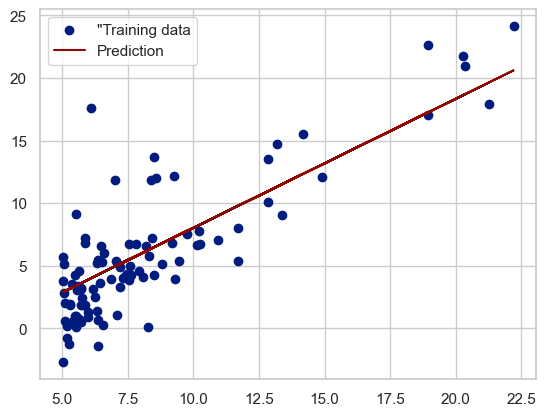

In [22]:
b = final_theta[0]
m = final_theta[1]

plt.scatter(data.population, data.profit, label='"Training data')
plt.plot(data.population, data.population*m + b, 'r', label='Prediction')
plt.legend(loc=2)
plt.show()

In [23]:
raw_data = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms', 'price'])
raw_data.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [24]:
def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [25]:
data = normalize_feature(raw_data)
data.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [26]:
X1 = get_X(data)
y1 = get_y(data)
print(X.shape, type(X1))
print(y.shape, type(y1))

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


In [27]:
alpha = 0.01
theta1 = np.zeros(X1.shape[1])
epoch = 500


In [28]:
final_theta, cost_data = batch_gradient_decent(theta1, X1, y1, epoch, alpha=alpha)


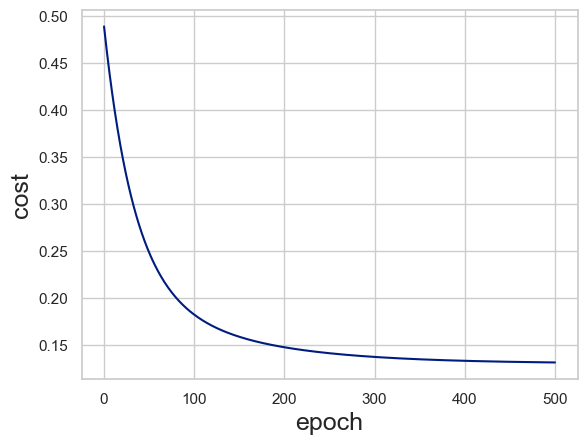

In [29]:
sns.lineplot(data=cost_data)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('cost', fontsize=18)
plt.show()

In [30]:
final_theta

array([-1.16762392e-16,  8.30383883e-01,  8.23982853e-04])

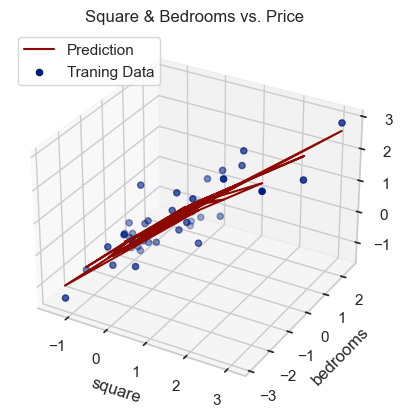

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X1, y1)
f = model.predict(X1).flatten()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X1[:, 1], X1[:, 2], f, 'r', label='Prediction')
ax.scatter(X1[:, 1], X1[:, 2], y1, label='Traning Data')

ax.legend(loc=2)
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
ax.set_title('Square & Bedrooms vs. Price')
plt.show()

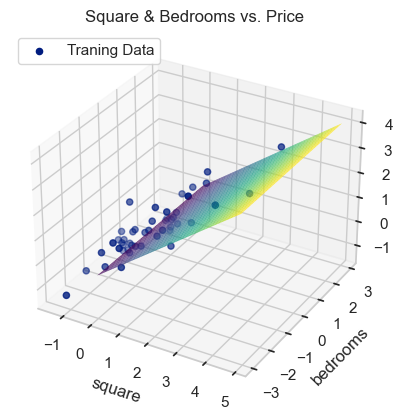

In [32]:
# X1, X2 = np.meshgrid(X[:, 1], X[:, 2])
X2, X3 = np.meshgrid(np.arange(0,5,0.1), np.arange(-3, 3, 0.1))
Y1 = final_theta[0] + final_theta[1]*X2 + final_theta[2]*X3
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot(X[:, 1], X[:, 2], f, 'r', label='Prediction')
ax.plot_surface(X2, X3, Y1, cmap='viridis',edgecolor='none',alpha=0.8)
ax.scatter(X1[:, 1], X1[:, 2], y1, label='Traning Data')

ax.legend(loc=2)
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
ax.set_title('Square & Bedrooms vs. Price')
plt.show()

In [33]:
base = np.logspace(-1, -5, num=4)
candidate = np.sort(np.concatenate((base, base*3, [1.2])))
candidate

array([1.00000000e-05, 3.00000000e-05, 2.15443469e-04, 6.46330407e-04,
       4.64158883e-03, 1.39247665e-02, 1.00000000e-01, 3.00000000e-01,
       1.20000000e+00])

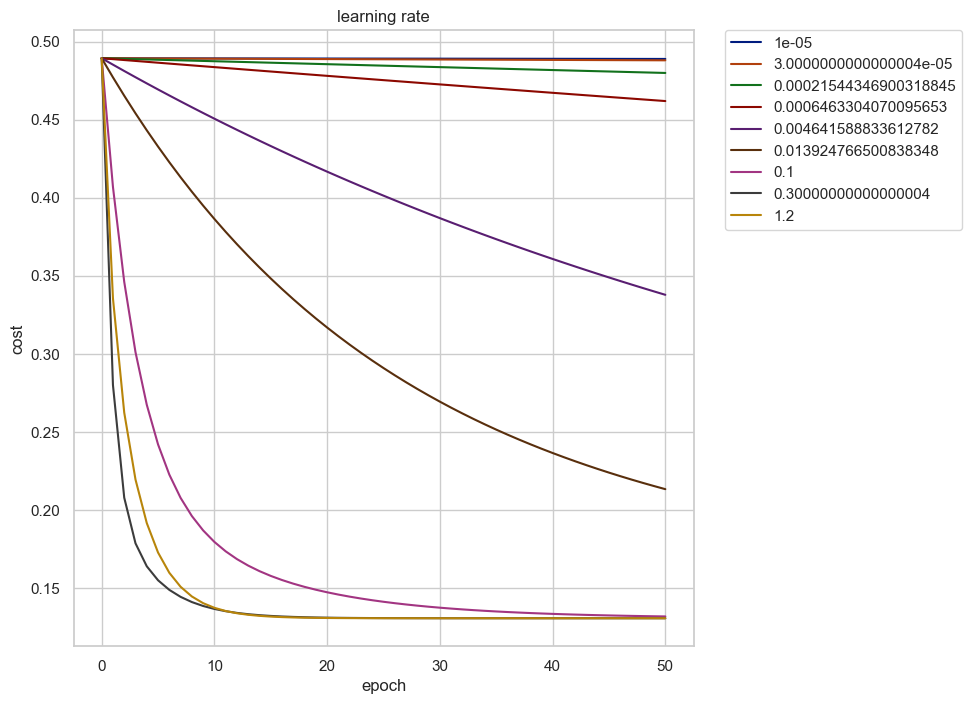

In [34]:
epoch =50
fig, ax = plt.subplots(figsize=(8, 8))
for alpha in candidate:
    _, cost_data = batch_gradient_decent(theta1, X1, y1, epoch, alpha=alpha)
    ax.plot(np.arange(epoch+1), cost_data, label=alpha)

ax.set_xlabel('epoch', fontsize=12)
ax.set_ylabel('cost', fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=12)
plt.show()

In [35]:
def normal_Equation(X, y):
    return np.linalg.inv(X.T@X)@X.T@y # X.T@X生成一个方阵，便于计算逆


In [36]:
final_theta2 = normal_Equation(X1, y1)
final_theta2

array([-9.36750677e-17,  8.84765988e-01, -5.31788197e-02])

In [37]:
final_theta

array([-1.16762392e-16,  8.30383883e-01,  8.23982853e-04])

In [38]:
np.linalg.inv(X1.T@X1)

array([[ 2.12765957e-02,  4.10374802e-18, -8.06218884e-18],
       [ 4.10374802e-18,  3.16695326e-02, -1.77338997e-02],
       [-8.06218884e-18, -1.77338997e-02,  3.16695326e-02]])

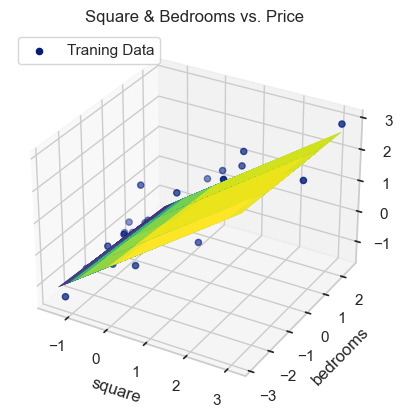

In [39]:
X2, X3 = np.meshgrid(X1[:, 1], X1[:, 2])
Y1 = final_theta[0] + final_theta[1]*X2 + final_theta[2]*X3
Y2 = final_theta2[0] + final_theta2[1]*X2 + final_theta2[2]*X3
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot(X[:, 1], X[:, 2], f, 'r', label='Prediction')
# ax.plot_surface(X1, X2, Y1, color='r')
ax.plot_surface(X2, X3, Y2, cmap='viridis', edgecolor='none', alpha=0.8)
ax.scatter(X1[:, 1], X1[:, 2], y1, label='Traning Data')

ax.legend(loc=2)
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
ax.set_title('Square & Bedrooms vs. Price')
plt.show()
